In [42]:
from typing import Set
from dataclasses import asdict
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from dateutil.parser import isoparse
from label import Label
from ast import literal_eval

In [43]:
df_issues = pd.read_csv("issues.csv")

In [44]:
df_issues.shape

(8673, 30)

In [45]:
df_issues.columns

Index(['Unnamed: 0', 'url', 'repository_url', 'labels_url', 'comments_url',
       'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user',
       'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone',
       'comments', 'created_at', 'updated_at', 'closed_at',
       'author_association', 'active_lock_reason', 'body', 'reactions',
       'timeline_url', 'performed_via_github_app', 'state_reason', 'score'],
      dtype='object')

In [61]:
def remove_duplicate_ids(dataset):
    return dataset.drop_duplicates("id")

def apply_isoparse(dataset, attribute):
    dataset[attribute] = dataset[attribute].apply(isoparse)

def calculate_completion_time(dataset):
    dataset["time_to_complete"] = (dataset["closed_at"] - dataset["created_at"])
    dataset["time_to_complete"] = dataset["time_to_complete"].apply(timedelta.total_seconds)

df_issues = df_issues.drop_duplicates("id")

In [47]:
df_issues = remove_duplicate_ids(df_issues)

df_issues["closed_at"] = df_issues["closed_at"].apply(isoparse)
df_issues["created_at"] = df_issues["created_at"].apply(isoparse)

In [62]:
calculate_completion_time(df_issues)

In [50]:
def load_label_str(label_str: str) -> Label:
    eval_result = literal_eval(label_str)
    return Label(**eval_result)

In [51]:
TAGS: Set[Label] = set()
for value in df_issues["labels"].values:
    labels = literal_eval(value)
    for elem in labels:
        TAGS.add(Label(**elem))
df_tags = pd.DataFrame.from_records([asdict(tag) for tag in TAGS])
df_tags

,id,node_id,url,name,color,default,description
0,854951979,MDU6TGFiZWw4NTQ5NTE5Nzk=,https://api.github.com/repos/TeamNewPipe/NewPi...,good first issue,5319e7,True,Easy/simple issues perfect for newcomers to ge...
1,1521910787,MDU6TGFiZWwxNTIxOTEwNzg3,https://api.github.com/repos/TeamNewPipe/NewPi...,player,68007a,False,"Issues related to any player (main, popup and ..."
2,3184808663,MDU6TGFiZWwzMTg0ODA4NjYz,https://api.github.com/repos/TeamNewPipe/NewPi...,CI,2551F0,False,Issue is related to the CI
3,256180711,MDU6TGFiZWwyNTYxODA3MTE=,https://api.github.com/repos/TeamNewPipe/NewPi...,question,cc317c,True,"Not really an issue, but more of a question ab..."
4,1695079919,MDU6TGFiZWwxNjk1MDc5OTE5,https://api.github.com/repos/TeamNewPipe/NewPi...,localisation / translation,144d3f,False,Everything that has to do with translations or...
5,3673063850,LA_kwDOAn8tB87a7oGq,https://api.github.com/repos/TeamNewPipe/NewPi...,database,A4E6E5,False,Issue is related to database operations
6,256180708,MDU6TGFiZWwyNTYxODA3MDg=,https://api.github.com/repos/TeamNewPipe/NewPi...,feature request,84b6eb,False,Issue is related to a feature in the app.
7,2525275230,MDU6TGFiZWwyNTI1Mjc1MjMw,https://api.github.com/repos/TeamNewPipe/NewPi...,user blocked us,d3657f,False,The issue author has blocked team member(s)
8,629136347,MDU6TGFiZWw2MjkxMzYzNDc=,https://api.github.com/repos/TeamNewPipe/NewPi...,discussion,bfd4f2,False,This needs to be discussed before anything is ...
9,2503301905,MDU6TGFiZWwyNTAzMzAxOTA1,https://api.github.com/repos/TeamNewPipe/NewPi...,template missing,ef5684,False,The bug/feature template is missing (e.g. the ...


In [52]:
print([tag.name for tag in TAGS])

['good first issue', 'player', 'CI', 'question', 'localisation / translation', 'database', 'feature request', 'user blocked us', 'discussion', 'template missing', 'queue', 'privacy & data protection', 'Android TV', 'waiting for author', 'meta', 'playlist', 'device/software specific', 'requires extractor change', 'GUI', 'bandcamp', 'youtube', 'ASAP', 'duplicate', 'codequality', 'wontfix', 'player notification', 'soundcloud', 'template ignored', 'accessibility', 'niche', 'bug', 'multiservice', 'help wanted', 'feed', 'downloader', 'media.ccc.de', 'peertube', 'needs triage', 'bounty', 'tablet UI', 'channel']


In [53]:
def to_color_name(colorID):
    return "#"+colorID.upper()

tag_colors = list(map(to_color_name, df_tags.color))

<AxesSubplot: >

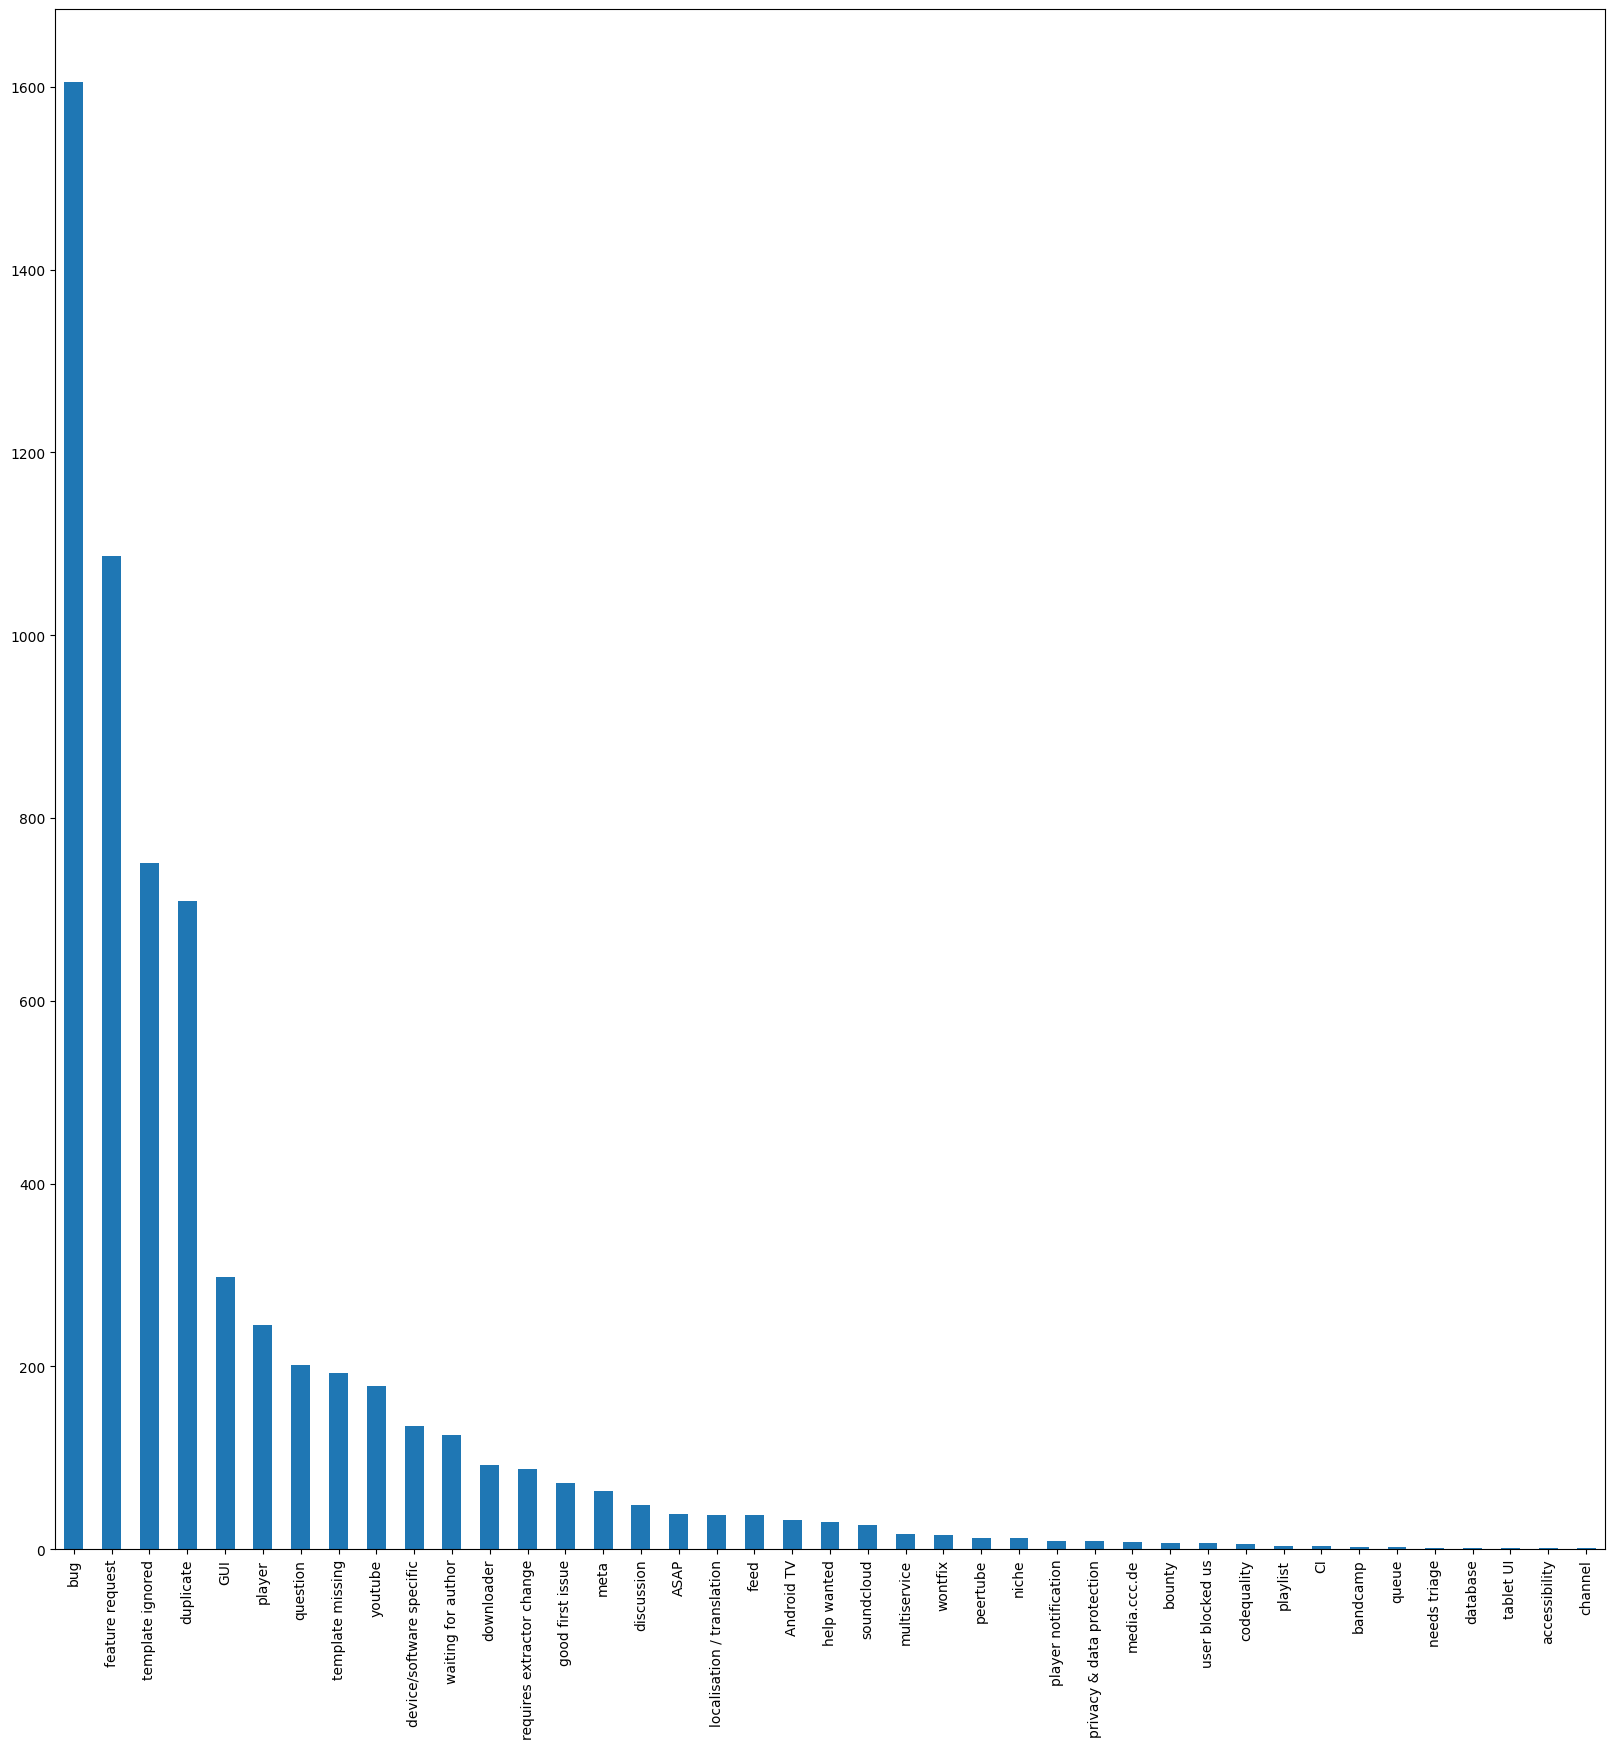

In [54]:
parsed_labels = [literal_eval(label_list) for idx, label_list in df_issues["labels"].items()] #parse labels
flattened_labels = [Label(**item) for item in itertools.chain.from_iterable(parsed_labels)] # flatten and convert to Label
labels_count = pd.Series(item.name for item in flattened_labels).value_counts()
labels_count.plot(kind="bar",)

Text(0.5, 1.0, 'Average time to complete issues')

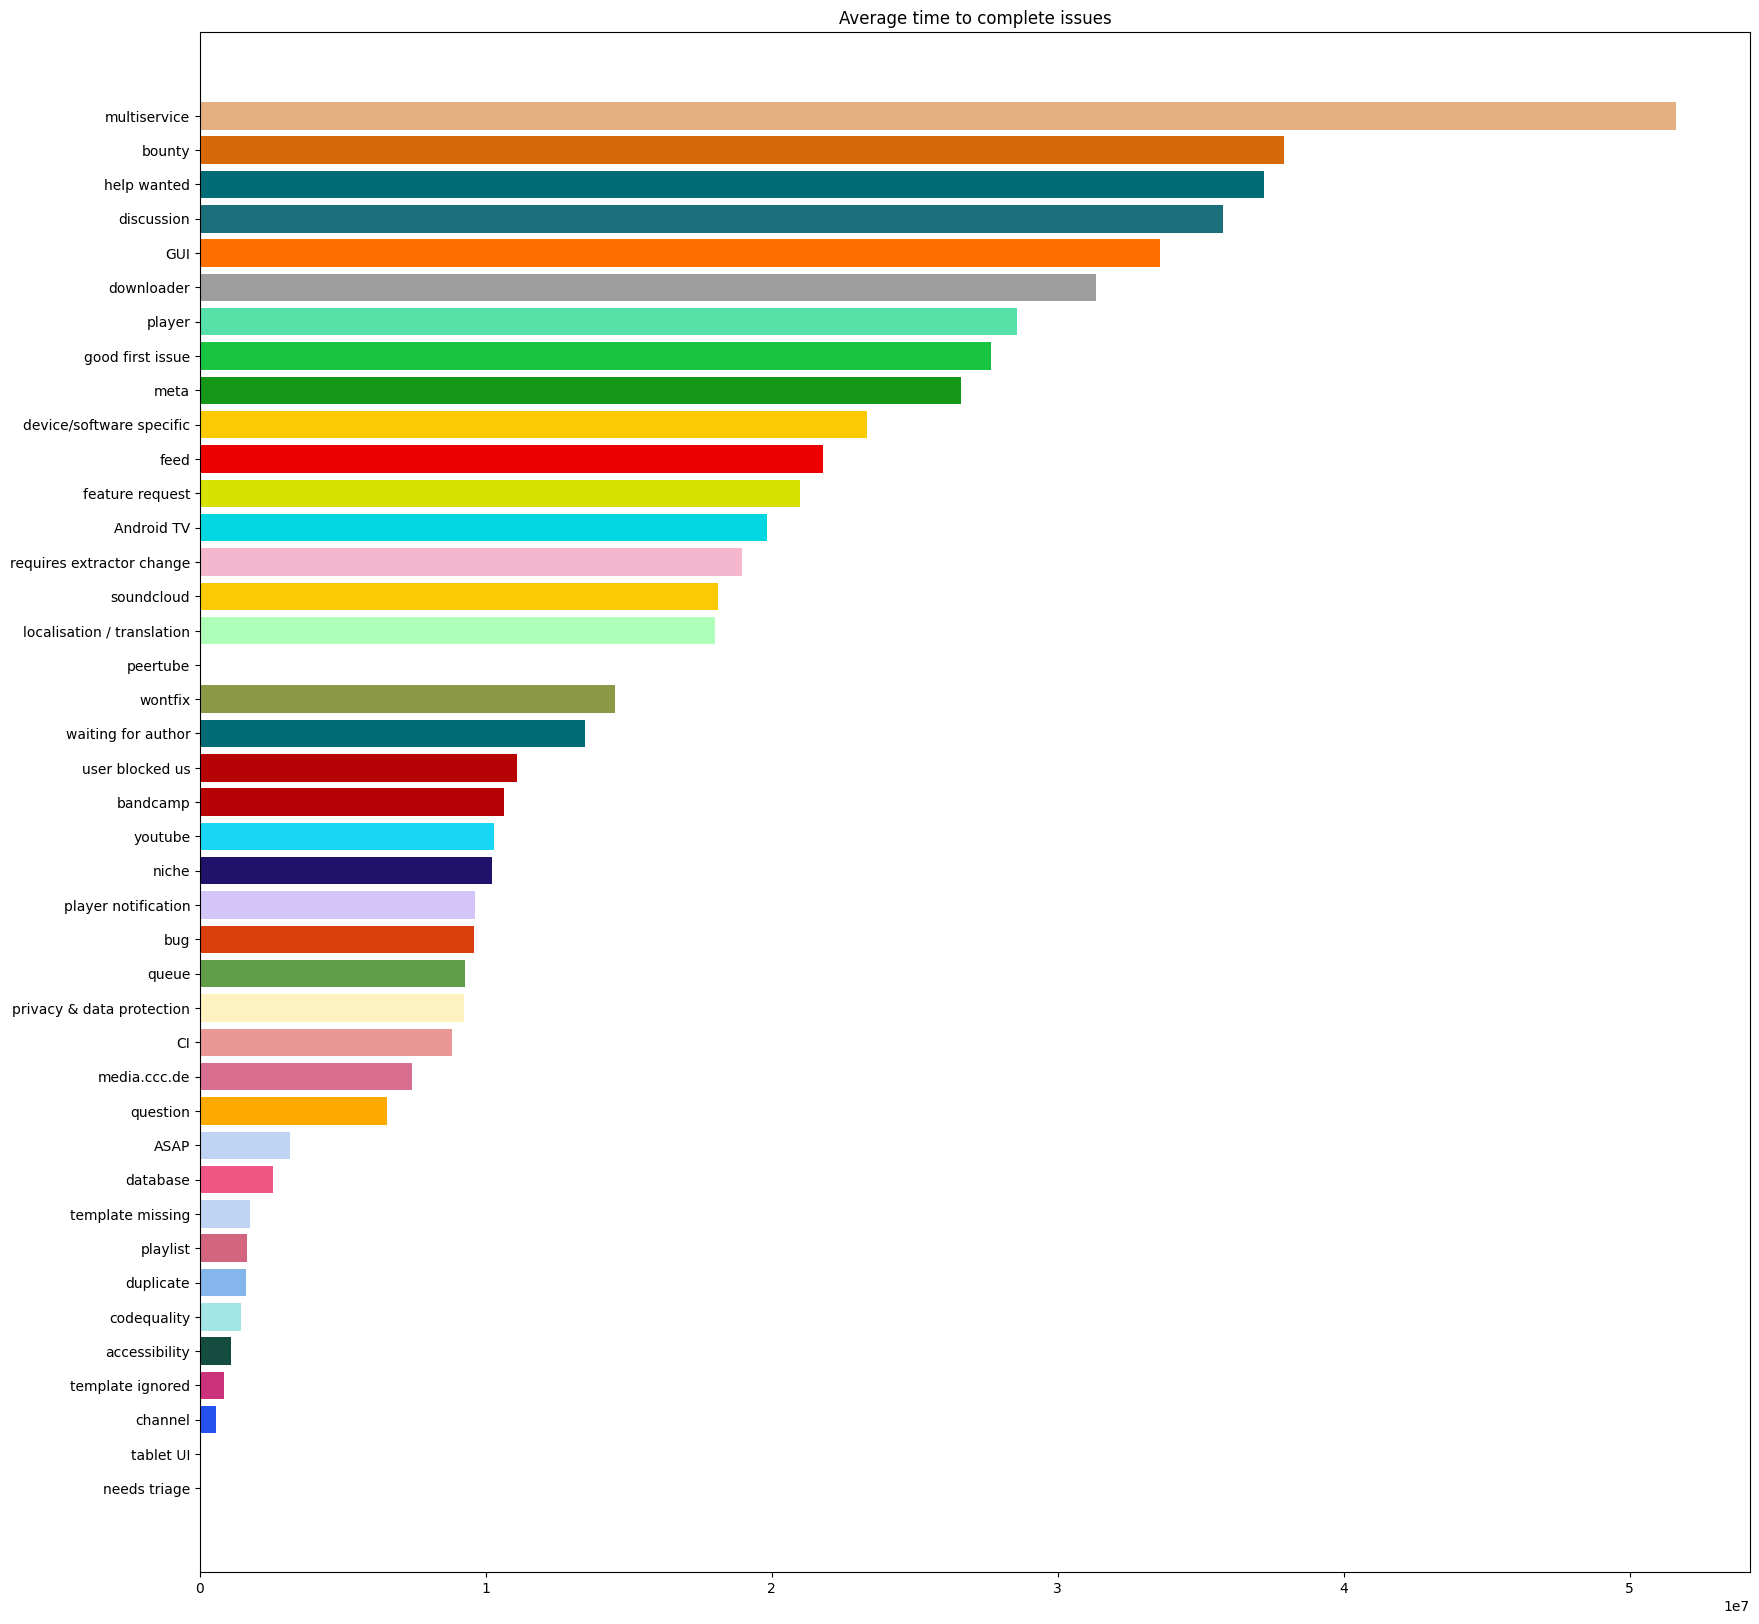

In [55]:
df_label_means = pd.DataFrame()
df_label_median = pd.DataFrame()
df_label_stddev = pd.DataFrame()
df_label_min = pd.DataFrame()
df_label_max = pd.DataFrame()

for tag in TAGS:
    mean = df_issues.loc[df_issues["labels"].str.contains(tag.node_id)]["time_to_complete"].mean()
    median = df_issues.loc[df_issues["labels"].str.contains(tag.node_id)]["time_to_complete"].median()
    df_label_means = pd.concat([df_label_means, pd.DataFrame.from_records([{"label": tag.name, "time_to_complete_avg": mean}])], ignore_index=True)

df_label_means = df_label_means.sort_values(by="time_to_complete_avg",ascending=True)
plt.barh(df_label_means.label, df_label_means.time_to_complete_avg, color=tag_colors)
plt.rcParams["figure.figsize"] = 20,20
plt.title("Average time to complete issues")

## RQ 01) Existe alguma diferença entre o tempo de resolução de issues entre os serviços suportados pelo NewPipe?

In [119]:
def filter_by_tags(dataset, attribute, tags):
    return dataset[dataset[attribute].isin(tags)]

def fetch_comparison_data(dataset, serviceName, exclude):
    if (exclude):
        return dataset.loc[dataset["labels"].str.contains(serviceName)]
    else:
        return dataset.loc[~dataset["labels"].str.contains(serviceName)]

def plot_data(title, xData, yData, color):
    plt.barh(xData, yData, color=color)
    plt.rcParams["figure.figsize"] = 20,20
    plt.title(title)

def compare_service(service):
    yes_dataset = fetch_comparison_data(df_issues, service, False)
    no_dataset = fetch_comparison_data(df_issues, service, True)
    # print(yes_dataset)
    # print(no_dataset)

    print_test_result(run_mw_test(yes_dataset, no_dataset, 'time_to_complete'))

def run_difference_between_issue_resolution():
    service_tags = ['bandcamp', 'youtube', 'media.ccc.de', 'soundcloud', 'peertube']
    for service in service_tags:
        compare_service(service)
    service_issue_time = filter_by_tags(df_label_means, 'label', service_tags)
    service_issue_time = service_issue_time.sort_values(by="time_to_complete_avg",ascending=True)

    plot_data("Average time to complete issues", service_issue_time.label, service_issue_time.time_to_complete_avg, tag_colors)

    print(service_issue_time.shape)

Mann-Whitney test result: the hypothesis service_timetime_to_complete == NON_service_timetime_to_complete is acepted with statistic 3054.0 and p-value 0.2712807636503285, with Cohen’s d effect size = 0.044005336875446714 [0.2 <= d (small), 0.5 <= d (medium), 0.8 <= d (large)].
Mann-Whitney test result: the H0 was rejected with statistic 314193.0 and p-value 6.802334836149792e-15. Then the alternative hypothesis service_timetime_to_complete < NON_service_timetime_to_complete was acepted with statistic 314193.0 and p-value 3.401167418074896e-15, with Cohen’s d effect size = 0.02855706462576002 [0.2 <= d (small), 0.5 <= d (medium), 0.8 <= d (large)].
Mann-Whitney test result: the H0 was rejected with statistic 12673.0 and p-value 0.036125825963755596. Then the alternative hypothesis service_timetime_to_complete < NON_service_timetime_to_complete was acepted with statistic 12673.0 and p-value 0.018062912981877798, with Cohen’s d effect size = 0.10451431273566499 [0.2 <= d (small), 0.5 <= d

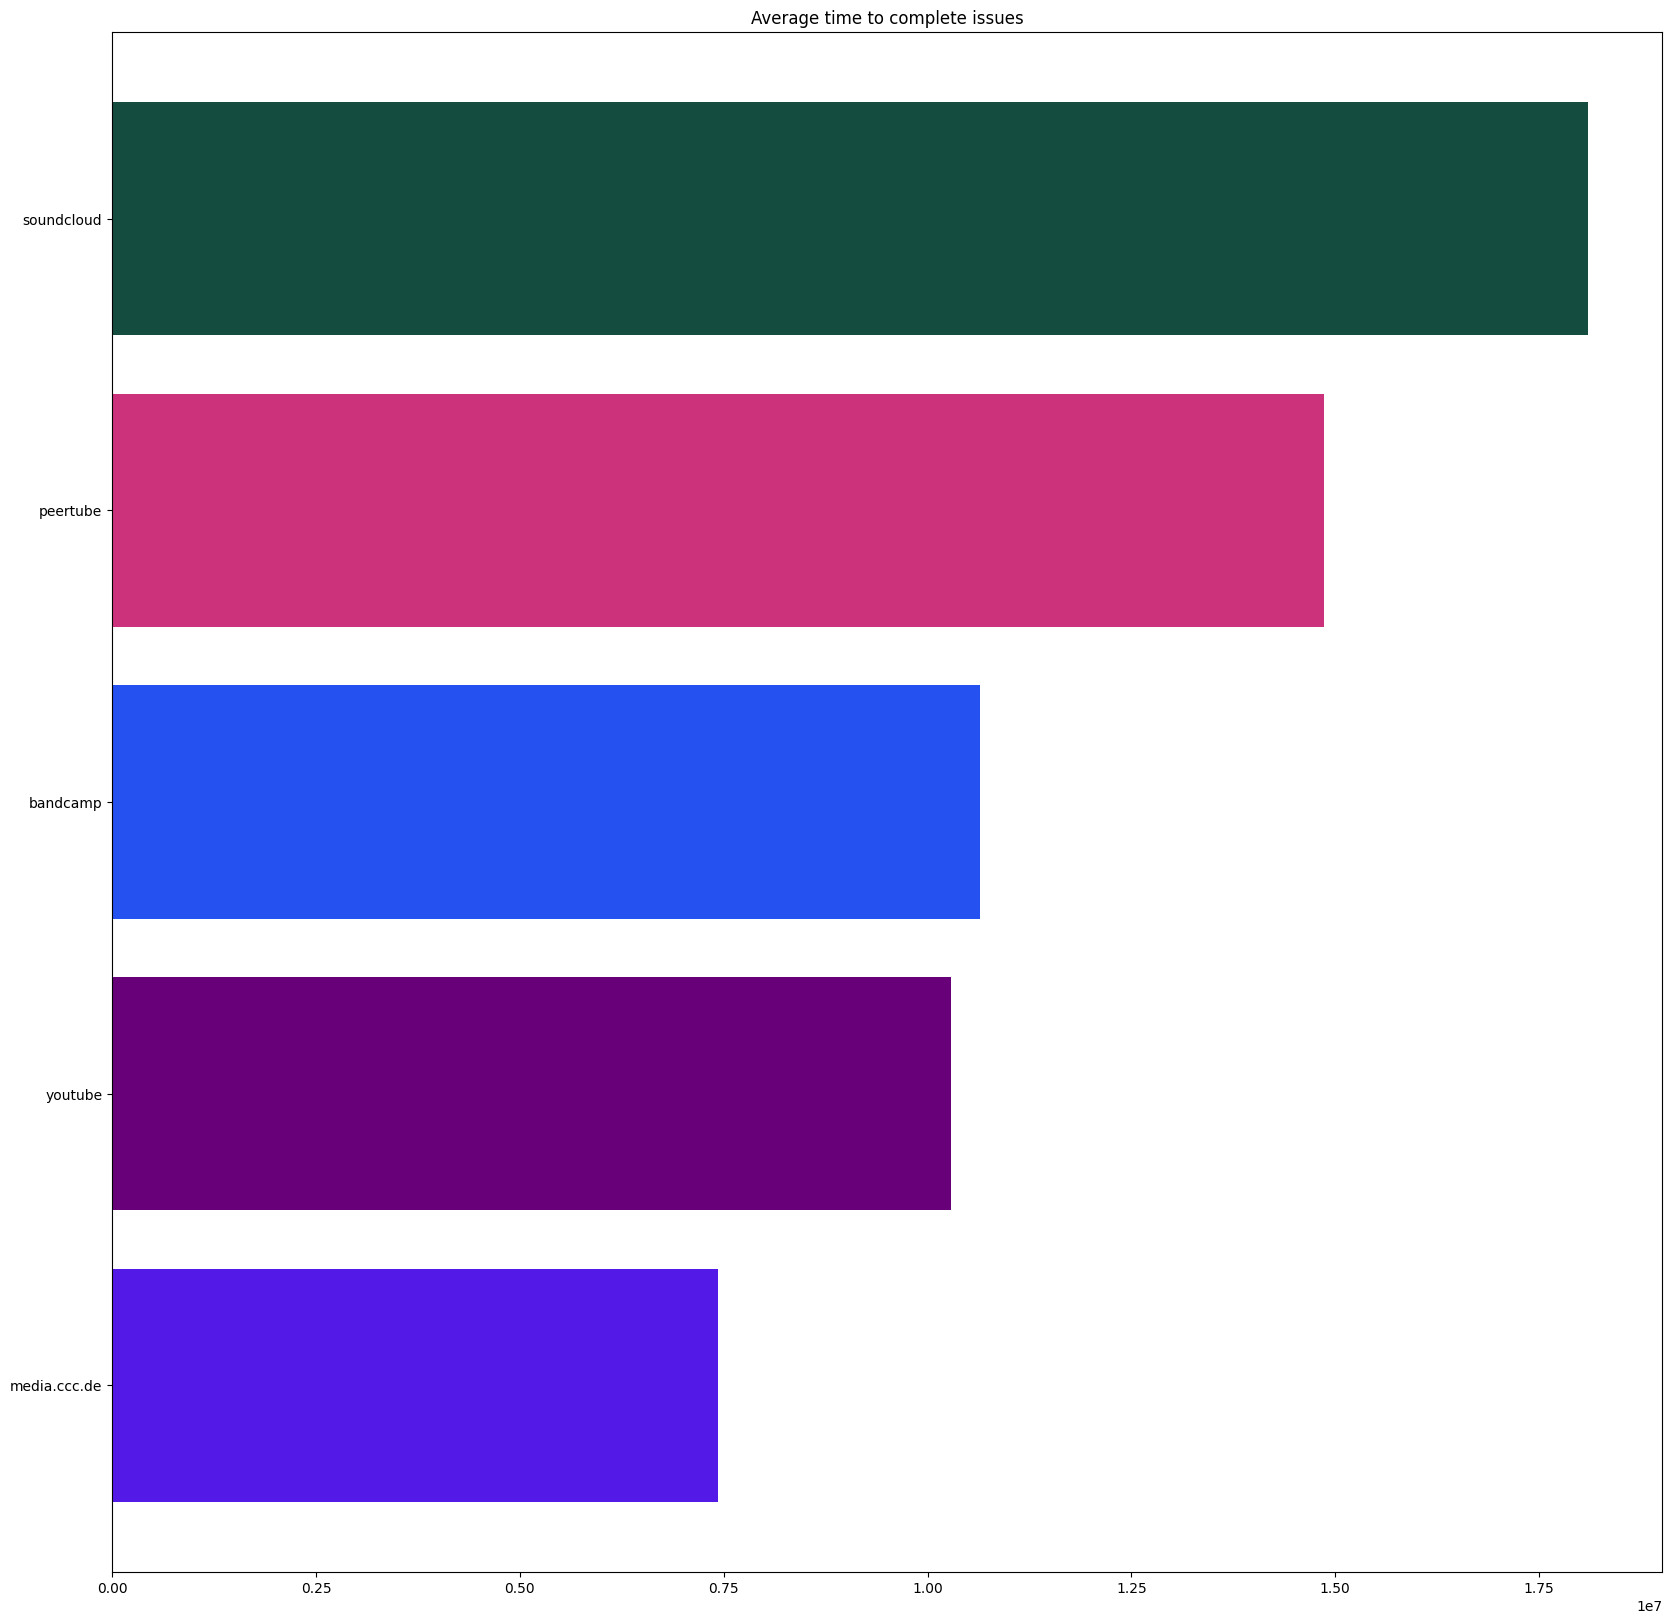

In [120]:
run_difference_between_issue_resolution()

## RQ 02) Qual é o tempo médio de triagem de issues?

In [ ]:
def average_issue_resolution_time():
    return

In [ ]:
average_issue_resolution_time()

## RQ 03) Quais módulos do sistema costumam sofrer mais alterações por uma issue?

## Código de Análise e Inferência

In [117]:
from scipy import stats
import numpy
import pingouin

def run_mw_test(service_time, non_service_time, attribute, alpha=0.05):
    result = {}
    result["test"] = "Mann-Whitney"
    result["h0"] = str("service_time" + attribute + " == NON_service_time" + attribute)
    result["h1"] = str("service_time" + attribute + " > NON_service_time" + attribute)
    result["h2"] = str("service_time" + attribute + " < NON_service_time" + attribute)
    
    mwu, p_value = stats.mannwhitneyu(service_time[attribute], non_service_time[attribute], alternative='two-sided')
    result["accepted"] = "h0"
    result["h0stats"] = mwu
    result["h0p-value"] = p_value
    if p_value > alpha:
        result["accepted"] = "h0"
    else :
        mwu, p_value = stats.mannwhitneyu(service_time[attribute], non_service_time[attribute], alternative='greater')        
        if p_value <= alpha:
            result["accepted"] = "h1"
        else :
            mwu, p_value = stats.mannwhitneyu(service_time[attribute], non_service_time[attribute], alternative='less')
            if p_value <= alpha:
                result["accepted"] = "h2"
                
    result["stats"] = mwu
    result["p-value"] = p_value
    result["effec-size"] = numpy.abs(pingouin.compute_effsize(service_time[attribute], non_service_time[attribute], eftype='cohen'))
    
    return result

    
def print_test_result(result):
    if result["accepted"] != "h0":
        print("{} test result: the H0 was rejected with statistic {} and p-value {}. Then the alternative hypothesis {} was acepted with statistic {} and p-value {}, with Cohen’s d effect size = {} [0.2 <= d (small), 0.5 <= d (medium), 0.8 <= d (large)].".format(
            result["test"],            
            result["h0stats"], 
            result["h0p-value"],            
            result[result["accepted"]], 
            result["stats"], 
            result["p-value"],
            result["effec-size"]))
    else:
        print("{} test result: the hypothesis {} is acepted with statistic {} and p-value {}, with Cohen’s d effect size = {} [0.2 <= d (small), 0.5 <= d (medium), 0.8 <= d (large)].".format(result["test"], result[result["accepted"]], result["stats"], result["p-value"], result["effec-size"]))